Course Human-Centered Data Science ([HCDS](https://www.mi.fu-berlin.de/en/inf/groups/hcc/teaching/winter_term_2020_21/course_human_centered_data_science.html)) - Winter Term 2020/21 - [HCC](https://www.mi.fu-berlin.de/en/inf/groups/hcc/index.html) | [Freie Universität Berlin](https://www.fu-berlin.de/)
***
# A2 - Reproducibility Workflow


## Step 1️⃣: Data acquisition
In order to measure Wikipedia traffic from January 2008 until October 2020, you will need to collect data from two different APIs:

1. The **Legacy Pagecounts API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pagecounts_data_(legacy)/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end)) provides access to desktop and mobile traffic data from December 2007 through July 2016.
1. The **Pageviews API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end)) provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.

For each API, you need to collect data for all months where data is available and then save the raw results into five (3+2) separate `JSON`files (one file per API query type) before continuing to step 2.

To get you started, you can use the following **sample code for API calls**:

First things first, we will include some packages we will need sooner or later:

In [51]:
import json  # because we will work with some data in the JSON format
import requests  # because we want to make a GEET-request to retrieve data from the wokimedia.org server
import pandas as pd  # because it provides functionality of data frames
import numpy as np  # because it has some functions to easily work with numbers
import matplotlib.pyplot as plt  # because our final goal is to create a plot

In [52]:
headers = {
    'User-Agent': 'https://github.com/nigrog',
    'From': 'gorgin@fu-berlin.de'
}

def api_call(endpoint):
    call = requests.get(endpoint, headers=headers)
    response = call.json()
    
    return response

Now, we need to know where to get the data from. We will create a list which contains both the endpoint to (address of) our data and a name for it:

In [53]:
endpoints = {"pageCountDesktop": "https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/en.wikipedia.org/desktop-site/monthly/2007120100/2016070100",
             "pageCountMobile" : "https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/en.wikipedia.org/mobile-site/monthly/2007120100/2016070100",
             "pageViewsDesktop": "https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/desktop/user/monthly/2015070100/2020111400",
             "pageViewsMobile" : "https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/mobile-web/user/monthly/2015070100/2020110100",
             "pageViewsApp"    : "https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/mobile-app/user/monthly/2015070100/2020110100"
            }

for i in endpoints:
    print(i, endpoints[i])

pageCountDesktop https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/en.wikipedia.org/desktop-site/monthly/2007120100/2016070100
pageCountMobile https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/en.wikipedia.org/mobile-site/monthly/2007120100/2016070100
pageViewsDesktop https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/desktop/user/monthly/2015070100/2020111400
pageViewsMobile https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/mobile-web/user/monthly/2015070100/2020110100
pageViewsApp https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/mobile-app/user/monthly/2015070100/2020110100


## Step 2: Data processing

Now we are ready to fetch some raw data. As data on the internet might be changed or not available at some point, we will stay on the safe side by saving this raw data: We will put it in a folder called "data_raw".
To fetch the data, we iterate through our `endpoints` and make use of the function `api_call` we defined earlier. Before that, we create a dictionary containing the full names of each file:

In [231]:
files = {}
path_data_raw = "data_raw/"

for endpoint in endpoints:
    files[endpoint] = path_data_raw + endpoint + str.replace(endpoints[endpoint][-22:],"/","-") + ".json"

# The following short snippet simply ensures that the subfolder exists and, if not, that it will be created
import os
if not os.path.exists(path_data_raw):
    os.mkdir(path_data_raw)


for endpoint in endpoints:
    data = api_call(endpoints[endpoint])
    with open(str(files[endpoint]), "w") as file:
        json.dump(data, file)  # dump the json-data into file

for file in files:
    print(file)

pageCountDesktop
pageCountMobile
pageViewsDesktop
pageViewsMobile
pageViewsApp


We now have the raw data in five json-Files in the subfolder `raw_data/`. Let's imagine the worst-case: The data online was changed or deleted. Hence, we will retrieve the snapshot we just created. Therefore, we first need to open and read the files. The content of the file is in the json-format so the `load()` method from the json package is what we will use for reading the file. Then we use pandas `json_normalize` function on that data. For now, we stop after that step:

In [232]:
for file in files:
    with open(files[file], "r") as file:
        json_data = json.load(file)
        json_norm = pd.json_normalize(json_data, 'items')
        print(json_norm.head())
        

        project   access-site granularity   timestamp       count
0  en.wikipedia  desktop-site     monthly  2007120100  2998331524
1  en.wikipedia  desktop-site     monthly  2008010100  4930902570
2  en.wikipedia  desktop-site     monthly  2008020100  4818393763
3  en.wikipedia  desktop-site     monthly  2008030100  4955405809
4  en.wikipedia  desktop-site     monthly  2008040100  5159162183
        project  access-site granularity   timestamp       count
0  en.wikipedia  mobile-site     monthly  2014100100  3091546685
1  en.wikipedia  mobile-site     monthly  2014110100  3027489668
2  en.wikipedia  mobile-site     monthly  2014120100  3278950021
3  en.wikipedia  mobile-site     monthly  2015010100  3485302091
4  en.wikipedia  mobile-site     monthly  2015020100  3091534479
        project   access agent granularity   timestamp       views
0  en.wikipedia  desktop  user     monthly  2015070100  4376666686
1  en.wikipedia  desktop  user     monthly  2015080100  4332482183
2  en.wikiped

We see that most columns are not what we are interested in. Our next goal is to create a csv file that looks like this:

| year | month |pagecount_all_views|pagecount_desktop_views|pagecount_mobile_views|pageview_all_views|pageview_desktop_views|pageview_mobile_views|
|------| ------|-------------------|-----------------------|----------------------|------------------|----------------------|---------------------|
| YYYY | MM    |num_views          |num_views              |num_views             |num_views         |num_views             |num_views            | 

To achieve this, we modify the step above. First, we create an empty dataframe `df`. To not get a key-error when trying to merge the first time, we already tell the first column, `timestamp` here. We then start iterating through the known `files` almost as above. After getting the dataframe, we do some renaming: The sources either called the counter `views` or `count`, since these columns will be put together into one dataframe, we need them named differently. Hence, we use `columns.str.replace(oldName,newName)`  twice (it will only work where the oldName exists but not throw an error otherwise). We then cut away columns we dont want and keep only timestamp and the column formerly known as either views or count. We then change the timestamp from `object/string` to `object/datetime`. Finally, we merge this temporary dataframe onto our complete dataframe `df`.

In [222]:
df = pd.DataFrame(columns=['timestamp'])

for fileKey in files:
    with open(files[fileKey], "r") as file:
        json_data = json.load(file)
        json_norm = pd.json_normalize(json_data, 'items')
        json_norm.columns = json_norm.columns.str.replace('views', str(fileKey[4:]))  # Columns might be named 
        json_norm.columns = json_norm.columns.str.replace('count', str(fileKey[4:]))
        json_norm = json_norm[['timestamp',str(fileKey[4:])]]
        json_norm["timestamp"] = pd.to_datetime(json_norm["timestamp"], format="%Y%m%d00")  # Convert string to date
        df = pd.merge(df, json_norm, on="timestamp", how="outer")

df

,timestamp,CountDesktop,CountMobile,ViewsDesktop,ViewsMobile,ViewsApp
0,2007-12-01,2.998332e+09,NaN,NaN,NaN,NaN
1,2008-01-01,4.930903e+09,NaN,NaN,NaN,NaN
2,2008-02-01,4.818394e+09,NaN,NaN,NaN,NaN
3,2008-03-01,4.955406e+09,NaN,NaN,NaN,NaN
4,2008-04-01,5.159162e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
150,2020-06-01,NaN,NaN,2.721329e+09,4.552042e+09,21933093.0
151,2020-07-01,NaN,NaN,2.638936e+09,4.675167e+09,134547886.0
152,2020-08-01,NaN,NaN,2.613058e+09,4.647875e+09,155433481.0
153,2020-09-01,NaN,NaN,2.661784e+09,4.345049e+09,147202116.0


Cool. Now we are missing this:
* For data collected from the Pageviews API, combine the monthly values for `mobile-app` and `mobile-web` to create a total mobile traffic count for each month.

Okay. Here, those columns are named **ViewsMobile** and **ViewsApp**, the two right-most columns. Just add them and add that as a new column. I did not name it **pageview_all_views** because it excludes _pageview_desktop_views_.

In [223]:
df['ViewsMobile+App'] = df["ViewsMobile"] + df["ViewsApp"]

Now we add the columns for **year** and **month**. Then we can remove the timestamp-column using the `drop` method, which we need to tell `axis='columns'` so it knows what to look for. 

In [224]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

df=df.drop(['timestamp'], axis='columns')

df

,CountDesktop,CountMobile,ViewsDesktop,ViewsMobile,ViewsApp,ViewsMobile+App,year,month
0,2.998332e+09,NaN,NaN,NaN,NaN,NaN,2007,12
1,4.930903e+09,NaN,NaN,NaN,NaN,NaN,2008,1
2,4.818394e+09,NaN,NaN,NaN,NaN,NaN,2008,2
3,4.955406e+09,NaN,NaN,NaN,NaN,NaN,2008,3
4,5.159162e+09,NaN,NaN,NaN,NaN,NaN,2008,4
...,...,...,...,...,...,...,...,...
150,NaN,NaN,2.721329e+09,4.552042e+09,21933093.0,4.573975e+09,2020,6
151,NaN,NaN,2.638936e+09,4.675167e+09,134547886.0,4.809714e+09,2020,7
152,NaN,NaN,2.613058e+09,4.647875e+09,155433481.0,4.803309e+09,2020,8
153,NaN,NaN,2.661784e+09,4.345049e+09,147202116.0,4.492251e+09,2020,9


Let's now create and rearrange the columns so they most likely fit the headers as shown here:

| year | month |pagecount_all_views|pagecount_desktop_views|pagecount_mobile_views|pageview_all_views|pageview_desktop_views|pageview_mobile_views|
|------| ------|-------------------|-----------------------|----------------------|------------------|----------------------|---------------------|
| YYYY | MM    |num_views          |num_views              |num_views             |num_views         |num_views             |num_views            | 

In [225]:
# pagecount_all_views seems to mean the sum of pagecount_*
df['pagecount_all_views'] = df["CountDesktop"] + df["CountMobile"]

# rearranging the columns
df = df[['year', 'month', 'pagecount_all_views', 'CountDesktop', 'CountMobile', 'ViewsMobile+App', 'ViewsDesktop', 'ViewsMobile' ]]

df

,year,month,pagecount_all_views,CountDesktop,CountMobile,ViewsMobile+App,ViewsDesktop,ViewsMobile
0,2007,12,NaN,2.998332e+09,NaN,NaN,NaN,NaN
1,2008,1,NaN,4.930903e+09,NaN,NaN,NaN,NaN
2,2008,2,NaN,4.818394e+09,NaN,NaN,NaN,NaN
3,2008,3,NaN,4.955406e+09,NaN,NaN,NaN,NaN
4,2008,4,NaN,5.159162e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
150,2020,6,NaN,NaN,NaN,4.573975e+09,2.721329e+09,4.552042e+09
151,2020,7,NaN,NaN,NaN,4.809714e+09,2.638936e+09,4.675167e+09
152,2020,8,NaN,NaN,NaN,4.803309e+09,2.613058e+09,4.647875e+09
153,2020,9,NaN,NaN,NaN,4.492251e+09,2.661784e+09,4.345049e+09


To save the dataframe as a CSV we can use the `to_csv(filename)` method. We'll put it in a subfolder called _data_clean_:

In [235]:
path_data_clean = "data_clean/"

if not os.path.exists(path_data_clean):
    os.mkdir(path_data_clean)

df.to_csv(path_data_clean + "en-wikipedia_traffic_200712-202010.csv")

## Step 3: Analysis

For this assignment, the "analysis" will be fairly straightforward: you will visualize the dataset you have created as a **time series graph**. Your visualization will track three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop). In order to complete the analysis correctly and receive full credit, your graph will need to be the right scale to view the data; all units, axes, and values should be clearly labeled; and the graph should possess a legend and a title. You must also generate a .png or .jpeg formatted image of your final graph.
Please graph the data in your notebook, rather than using an external application!

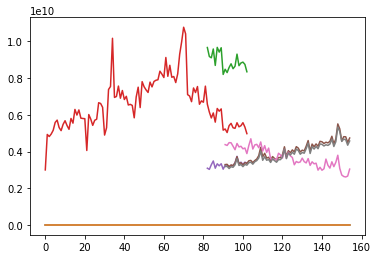

In [261]:
colors = []

plt.xlabel = "Year"
# plt.xlabel("Year")
# plt.ylabel("Views (Billion)")
# plt.title("Page Views on English Wikipedia")

plt.plot(df)

plt.show()

***

#### Credits

This exercise is slighty adapted from the course [Human Centered Data Science (Fall 2019)](https://wiki.communitydata.science/Human_Centered_Data_Science_(Fall_2019)) of [Univeristy of Washington](https://www.washington.edu/datasciencemasters/) by [Jonathan T. Morgan](https://wiki.communitydata.science/User:Jtmorgan).

Same as the original inventors, we release the notebooks under the [Creative Commons Attribution license (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/).